In [92]:
# Import the required libraries
import numpy as np
import pandas as pd
import re

In [93]:
# Load the file into a pandas data frame
#df = pd.read_csv("Export.csv")
df = pd.read_csv('Export.csv', dtype={'Facebook': str})
df.head(15)

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 10:43:57 PM
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 5:15:01 PM
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM
5,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,Y,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40:56 AM
6,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,NaN,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,New York,...,Y,N,Y,N,Y,N,N,N,N,4/7/2014 4:32:01 PM
7,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,N,Y,N,N,N,N,N,N,4/3/2014 3:43:31 PM
8,1008071,14&U Farmers' Market,NaN,https://www.facebook.com/14UFarmersMarket,https://twitter.com/14UFarmersMkt,NaN,NaN,1400 U Street NW,Washington,District of Columbia,...,N,Y,Y,Y,Y,N,N,N,N,4/5/2014 1:49:04 PM
9,1012710,14th & Kennedy Street Farmers Market,NaN,https://www.facebook.com/14KennnedyFarmersMarket/,14KenFM,NaN,instagram:14kenfm,"5500 Colorado Avenue, NW",Washington,District of Columbia,...,Y,N,Y,N,N,N,Y,N,N,7/20/2016 11:16:24 AM


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 59 columns):
FMID             8711 non-null int64
MarketName       8711 non-null object
Website          5228 non-null object
Facebook         3977 non-null object
Twitter          1005 non-null object
Youtube          167 non-null object
OtherMedia       744 non-null object
street           8421 non-null object
city             8671 non-null object
County           8197 non-null object
State            8711 non-null object
zip              7769 non-null object
Season1Date      5514 non-null object
Season1Time      5680 non-null object
Season2Date      448 non-null object
Season2Time      438 non-null object
Season3Date      82 non-null object
Season3Time      78 non-null object
Season4Date      6 non-null object
Season4Time      6 non-null object
x                8682 non-null float64
y                8682 non-null float64
Location         2696 non-null object
Credit           8711 non-null o

In [95]:
#df['Facebook'] = str(df['Facebook'])
df['Facebook'] = df['Facebook'].astype('str')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 59 columns):
FMID             8711 non-null int64
MarketName       8711 non-null object
Website          5228 non-null object
Facebook         8711 non-null object
Twitter          1005 non-null object
Youtube          167 non-null object
OtherMedia       744 non-null object
street           8421 non-null object
city             8671 non-null object
County           8197 non-null object
State            8711 non-null object
zip              7769 non-null object
Season1Date      5514 non-null object
Season1Time      5680 non-null object
Season2Date      448 non-null object
Season2Time      438 non-null object
Season3Date      82 non-null object
Season3Time      78 non-null object
Season4Date      6 non-null object
Season4Time      6 non-null object
x                8682 non-null float64
y                8682 non-null float64
Location         2696 non-null object
Credit           8711 non-null o

In [97]:
df.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 10:43:57 PM
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 5:15:01 PM
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,nan,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,nan,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
4,1002454,112st Madison Avenue,NaN,nan,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM


In [98]:
# Cleanup the `Facebook` and `Twitter` column to let them contain only the facebook username or twitter handle name
#df['Facebook'] = re.sub(".*book/", "", str(df['Facebook']))

#df['Facebook'] = re.sub(".*book.com", "", str(df['Facebook']))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('.*book.com/','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('.*book.com','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('.*book/','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('\\.net','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('pages','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('\\?.*','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('#|#/','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('!/','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('groups','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('/|@','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('http:fb.me','',x))
df['Facebook'] = df['Facebook'].apply(lambda x: re.sub('-[0-9].*','',x))


In [99]:
df.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,Danville.VT.Farmers.Market,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 10:43:57 PM
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 5:15:01 PM
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,nan,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,nan,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
4,1002454,112st Madison Avenue,NaN,nan,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM


In [100]:
df['Twitter'] = df['Twitter'].astype('str')

In [101]:
df['Twitter'] = df['Twitter'].apply(lambda x: re.sub('.*.com/','',x))
df['Twitter'] = df['Twitter'].apply(lambda x: re.sub('.*@','',x))
df['Twitter'] = df['Twitter'].apply(lambda x: re.sub('/','',x))
df['Twitter'] = df['Twitter'].apply(lambda x: re.sub('\','',x))

In [102]:
df.Twitter

0                     nan
1                     nan
2                     nan
3                     nan
4                     nan
5          12southfrmsmkt
6         FarmMarket125th
7                     nan
8           14UFarmersMkt
9                 14KenFM
10             GoodEatsBX
11                    nan
12                    nan
13                    nan
14                    nan
15                    nan
16                    nan
17                    nan
18                21acres
19                    nan
20                    nan
21                    nan
22                    nan
23                    nan
24                    nan
25                    nan
26                    nan
27                    nan
28                    nan
29      31mainfarmmarkt\t
              ...        
8681                  nan
8682                  nan
8683                  nan
8684                  nan
8685                  nan
8686                  nan
8687                  nan
8688        

In [104]:
df['city'] = df['city'].astype('str')

In [105]:
df['city'] = df['city'].apply(lambda x: re.sub('City',' ',x))
df['city'] = df['city'].apply(lambda x: re.sub(',.*',' ',x))

In [106]:
df.city

0                   Danville
1                     Parma 
2                   Six Mile
3                     Lamar 
4                   New York
5                  Nashville
6                   New York
7                 Wilmington
8                 Washington
9                Washington 
10                     Bronx
11                 New York 
12               Minneapolis
13                 Richmond 
14              Philadelphia
15               Scottsbluff
16               Charleston 
17                 Chiefland
18               Woodinville
19                    Topeka
20              Philadelphia
21                 Highlands
22               North Logan
23              Philadelphia
24              Philadelphia
25                   Amherst
26                    Dayton
27                    Morris
28            Rosemary Beach
29                     Ewing
                ...         
8681                     nan
8682               Asheville
8683         Virginia Beach 
8684          

In [107]:
df['street'] = df['street'].astype('str')

In [108]:
df['Location'] = df['Location'].astype('category')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8711 entries, 0 to 8710
Data columns (total 59 columns):
FMID             8711 non-null int64
MarketName       8711 non-null object
Website          5228 non-null object
Facebook         8711 non-null object
Twitter          8711 non-null object
Youtube          167 non-null object
OtherMedia       744 non-null object
street           8711 non-null object
city             8711 non-null object
County           8197 non-null object
State            8711 non-null object
zip              7769 non-null object
Season1Date      5514 non-null object
Season1Time      5680 non-null object
Season2Date      448 non-null object
Season2Time      438 non-null object
Season3Date      82 non-null object
Season3Time      78 non-null object
Season4Date      6 non-null object
Season4Time      6 non-null object
x                8682 non-null float64
y                8682 non-null float64
Location         2696 non-null category
Credit           8711 non-null

In [110]:
df.Location.unique()

[NaN, Private business parking lot, Federal/State government building grounds, On a farm from: a barn, a greenhouse, a tent, ..., Other, ..., Closed-off public street, Local government building grounds, Co-located with wholesale market facility, Educational institution, Healthcare Institution]
Length: 11
Categories (10, object): [Private business parking lot, Federal/State government building grounds, On a farm from: a barn, a greenhouse, a tent, ..., Other, ..., Local government building grounds, Co-located with wholesale market facility, Educational institution, Healthcare Institution]

In [111]:
df['Location'] = df['Location'].cat.rename_categories({"Closed-off public street" :"Clo Pub St",  
                                    "Co-located with wholesale market facility": "Co w market fac",    
                                   "Educational institution": "Ed Inst",    
                                    "Faith-based institution (e.g., church, mosque, synagogue, temple)":"Faith Inst",
                                   "Federal/State government building grounds": "Govt_build_grond",
                                   "Healthcare Institution": "Hlc Inst",
                                   "Local government building grounds": "Loc gvt Bld gr", 
                                   "On a farm from: a barn, a greenhouse, a tent, a stand, etc": "On farm",  
                                    "Other" : "Other" ,  
                                   "Private business parking lot": "Pvt PL"})

In [112]:
df.Location.unique()

[NaN, Pvt PL, Govt_build_grond, On farm, Other, ..., Clo Pub St, Loc gvt Bld gr, Co w market fac, Ed Inst, Hlc Inst]
Length: 11
Categories (10, object): [Pvt PL, Govt_build_grond, On farm, Other, ..., Loc gvt Bld gr, Co w market fac, Ed Inst, Hlc Inst]

In [118]:
print (df.groupby(['Location']).size())

Location
Clo Pub St          232
Co w market fac       5
Ed Inst              87
Faith Inst          105
Govt_build_grond     60
Hlc Inst             66
Loc gvt Bld gr      871
On farm              79
Other               524
Pvt PL              667
dtype: int64


In [119]:
import matplotlib.pyplot as plt

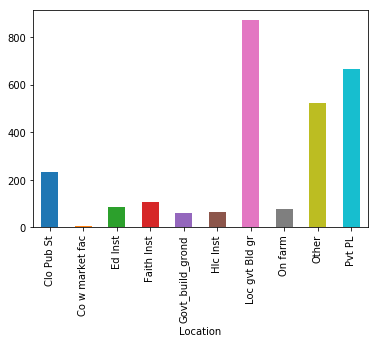

In [120]:
groups = df.groupby(['Location']).size()
groups.plot.bar()

In [126]:
groups = groups.sort_values(ascending=False)

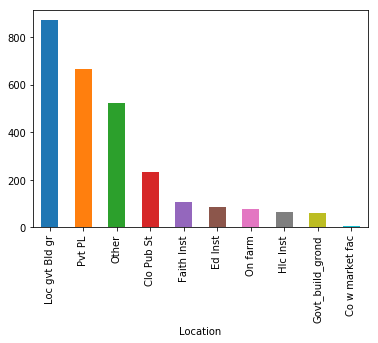

In [127]:
groups.plot.bar()

In [130]:
kyfprojects = pd.read_excel("kyfprojects.xls")

In [131]:
kyfprojects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 18 columns):
Project Title           2289 non-null object
Program Name            2379 non-null object
Program Abbreviation    2379 non-null object
Year                    2379 non-null int64
State                   2379 non-null object
Town                    2379 non-null object
Zip                     1915 non-null object
USDA Agency             2379 non-null object
USDA Mission Area       2379 non-null object
Recipient               2379 non-null object
Recipient Type          2379 non-null object
Funding Amount ($)      2378 non-null float64
Funding Type            2379 non-null object
Description             2379 non-null object
Topic_A                 2379 non-null object
Topic_B                 983 non-null object
Topic_C                 132 non-null object
More Information        2353 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 334.6+ KB


In [132]:
kyfprojects.head()

,Project Title,Program Name,Program Abbreviation,Year,State,Town,Zip,USDA Agency,USDA Mission Area,Recipient,Recipient Type,Funding Amount ($),Funding Type,Description,Topic_A,Topic_B,Topic_C,More Information
0,"""Buy Illinois: Choose Illinois"" and ""Illinois-...",Specialty Crop Block Grant,SCBG,2009,IL,Springfield,62702,AMS,Marketing and Regulatory Programs,CBS Broadcasting,Business,83942.33,Grant,Create ads on television and the internet invo...,Other Markets,NaN,NaN,http://www.illinoiswherefreshis.com/
1,"""Growing Farmers, Nurturing Consumers, and a N...",Farmers Market Promotion Program,FMPP,2009,MN,Onamia,56359,AMS,Marketing and Regulatory Programs,Onamia Community Education,Nonprofit,51047.00,Grant,Supports a new EBT project; ongoing educationa...,Healthy Food Access,Infrastructure,NaN,http://www.ams.usda.gov/fmpp
2,"""Growing the Capacity of New Mexico's Farmers'...",Farmers Market Promotion Program,FMPP,2009,NM,Santa Fe,87501,AMS,Marketing and Regulatory Programs,New Mexico Farmers' Marketing Association,Nonprofit,26070.00,Grant,To continue the expansion of new EBT usage at ...,Healthy Food Access,Infrastructure,NaN,http://www.ams.usda.gov/fmpp
3,"""Health Foods, Health Families NEW EBT Project""",Farmers Market Promotion Program,FMPP,2009,LA,Baton Rouge,70803,AMS,Marketing and Regulatory Programs,Big River Economic & Agricultural Development ...,Nonprofit,52566.00,Grant,Funds new EBT projects at 3 farmers markets in...,Healthy Food Access,Infrastructure,NaN,http://www.ams.usda.gov/fmpp
4,2009 RBEG-Ajo Cooks!,Rural Business Enterprise Grant,RBEG,2009,AZ,Ajo,85321,RBS,Rural Development,International Sonoran Desert Alliance,Nonprofit,99500.00,Grant,Convert two former elementary school classroom...,Infrastructure,Careers in Agriculture,NaN,http://www.isdanet.org/


In [134]:
num_null_program_name = kyfprojects['Program Name'].isna().sum() 

In [136]:
if num_null_program_name == 0:
    print ("TRUE")
else:
    print ("FALSE")
    

TRUE
